In [4]:
import torch
import torchvision
from torchvision import transforms, datasets

In [5]:
train = datasets.MNIST("", train = True, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

In [6]:
test = datasets.MNIST("", train = False, download = True, 
                     transform = transforms.Compose([transforms.ToTensor()]))

In [7]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset  = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [9]:
for data in trainset:
    print(data)
    break
    

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [10]:
x, y = data[0][0], data[1][0]
print(y)

tensor(0)


In [11]:
import matplotlib.pyplot as plt

In [12]:
#plt.imshow(data[0][0])
print(data[0][0].shape)

torch.Size([1, 28, 28])


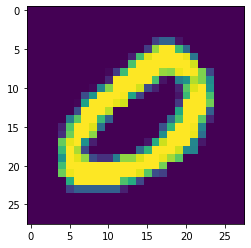

In [13]:
plt.imshow(data[0][0].view(28,28))

In [17]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0 , 5:0 ,6:0 , 7:0, 8:0 , 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] +=1
        total+=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [18]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001
